In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.keras.__version__

'2.6.0'

In [3]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels), (test_data,test_labels)=reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
# 샘플데이터 갯수
print(len(train_data))

# 테스트데이터 갯수
print(len(test_data))

# train_data 값 확인
print(train_data[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
import pandas as pd
pd.Series(train_labels).nunique() # series로의 변환 필요, train_labels의 고유값 갯수 확인

46

In [6]:
import numpy as np

# 벡터화
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [7]:
len(x_train[0])

10000

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [9]:
len(one_hot_train_labels[0])

46

In [10]:
# keras 내장함수
from keras.utils.np_utils import to_categorical # 범주화
# tensorflow.keras.utils import to_categorical 과 비슷함

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# 마지막 Dense 층의 크기가 46입니다. 각 입력 샘플에 대해서 46차원의 벡터를 출력한다는 뜻입니다. 
# 이 벡터의 각 원소(각 차원)은 각기 다른 출력 클래스가 인코딩된 것입니다.
# 마지막 층에 softmax 활성화 함수가 사용되었습니다. MNIST 예제에서 이런 방식을 보았습니다. 
# 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력합니다. 
# 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률입니다. 46개의 값을 모두 더하면 1이 됩니다.

- sigmoid function : 양수로 커질수록 1에 가까워지고 음수로 갈수록 0에 가까워짐. 0에서 멀어지면 training이 잘 안 된다는 의미.
- Softmax function : 자신의 가중 합뿐만 아니라, 다른 출력 노드들의 가중 합도 고려, 범주 수만큼의 차원을 갖는 입력벡터를 받아서 확률(요소의 합이 1)로 변환. \
 예측이 잘 이루어지면 1에 가까운 출력은 하나만 있고 다른 출력은 0에 가까워지지만 예측이 잘 이루어지지 않으면 여러 레이블이 비슷한 확률을 가지게 될 수 있음.

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 2.5529 - acc: 0.5031 - val_loss: 1.7058 - val_acc: 0.6320
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 1.4220 - acc: 0.6974 - val_loss: 1.3253 - val_acc: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 34ms/step - loss: 1.0743 - acc: 0.7648 - val_loss: 1.1562 - val_acc: 0.7300
Epoch 4/20
16/16 [==============================] - 1s 34ms/step - loss: 0.8497 - acc: 0.8183 - val_loss: 1.0635 - val_acc: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 33ms/step - loss: 0.6778 - acc: 0.8592 - val_loss: 0.9658 - val_acc: 0.8160
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5415 - acc: 0.8906 - val_loss: 0.9249 - val_acc: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4367 - acc: 0.9105 - val_loss: 0.8854 - val_acc: 0.8130
Epoch 8/20
16/16 [==============================] - 1s 34ms/step - loss: 0.3541 - a

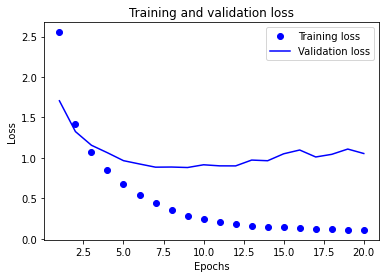

In [15]:
# 손실과 정확도 곡선
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

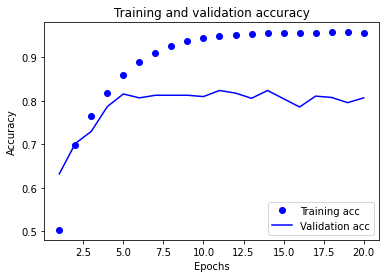

In [16]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 44ms/step - loss: 2.6699 - accuracy: 0.5127 - val_loss: 1.7714 - val_accuracy: 0.6470
Epoch 2/9
16/16 [==============================] - 1s 34ms/step - loss: 1.4463 - accuracy: 0.7050 - val_loss: 1.3041 - val_accuracy: 0.7200
Epoch 3/9
16/16 [==============================] - 1s 33ms/step - loss: 1.0554 - accuracy: 0.7731 - val_loss: 1.1244 - val_accuracy: 0.7680
Epoch 4/9
16/16 [==============================] - 1s 33ms/step - loss: 0.8243 - accuracy: 0.8236 - val_loss: 1.0201 - val_accuracy: 0.7850
Epoch 5/9
16/16 [==============================] - 1s 34ms/step - loss: 0.6571 - accuracy: 0.8591 - val_loss: 0.9608 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 1s 35ms/step - loss: 0.5237 - accuracy: 0.8920 - val_loss: 0.9276 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 35ms/step - loss: 0.4201 - accuracy: 0.9113 - val_loss: 0.9030 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [18]:
results

# 대략 78%의 정확도를 달성했습니다. 균형 잡힌 이진 분류 문제에서 완전히 무작위로 분류하면 50%의 정확도를 달성합니다. 
# 이 문제는 불균형한 데이터셋을 사용하므로 무작위로 분류하면 19% 정도를 달성합니다. 여기에 비하면 이 결과는 꽤 좋은 편입니다:

[0.99872887134552, 0.7880676984786987]

In [19]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1892252894033838

## 새로운 데이터에 대해 예측

In [21]:
predictions = model.predict(x_test)
predictions[0].shape # predictions의 각 항목은 길이가 46인 벡터

(46,)

In [23]:
np.sum(predictions[0]) # 이 벡터의 원소 합 = 1

0.9999999

In [25]:
np.argmax(predictions[0])

3

## 레이블과 손실을 다루는 방법

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

## 충분히 큰 중간층을 두어야 하는 이유

In [27]:
# 마지막 출력이 46차원이기 때문에 중간층의 히든 유닛이 46개보다 많이 적어서는 안 됩니다. 
# 46차원보다 훨씬 작은 중간층(예를 들면 4차원)을 두면 정보의 병목이 어떻게 나타나는지 확인해 보겠습니다.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 3.3789 - accuracy: 0.3591 - val_loss: 3.0621 - val_accuracy: 0.3290
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 2.7273 - accuracy: 0.3054 - val_loss: 2.5800 - val_accuracy: 0.3230
Epoch 3/20
63/63 [==============================] - 1s 14ms/step - loss: 2.1062 - accuracy: 0.4255 - val_loss: 1.8832 - val_accuracy: 0.6690
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.3622 - accuracy: 0.7139 - val_loss: 1.4343 - val_accuracy: 0.6760
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.0882 - accuracy: 0.7279 - val_loss: 1.3511 - val_accuracy: 0.6950
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 0.9767 - accuracy: 0.7383 - val_loss: 1.3360 - val_accuracy: 0.7020
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.8905 - accuracy: 0.7577 - val_loss: 1.4078 - val_accuracy: 0.7030
Epoch 8/20
63

In [ ]:
# 검증 정확도의 최고 값은 약 71%로 8% 정도 감소되었습니다. 
# 이런 손실의 대부분 원인은 많은 정보(46개 클래스의 분할 초평면을 복원하기에 충분한 정보)를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문입니다. 
# 이 네트워크는 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했습니다.

- N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense 층의 크기는 N이어야 합니다.
- 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 합니다.
- 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 합니다. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화합니다.
- 다중 분류에서 레이블을 다루는 두 가지 방법이 있습니다.
  - 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_rossentropy 손실 함수를 사용합니다.
  - 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용합니다
- 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야합니다.